In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [3]:
root_dir = './dataset/'
categorie = os.listdir(root_dir)
categorie

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [4]:
data=[]
labels=[]

for i in range(len(categorie)):
    tmp = os.listdir(f'{root_dir}{categorie[i]}/')
    tmp = shuffle(tmp)
    for img in tqdm(tmp):
        image = cv2.imread(f"{root_dir}{categorie[i]}/{img}")
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (100, 100))
        image = cv2.GaussianBlur(image, (5, 5), 0)
        image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
        data.append(np.array(image))
        labels.append(i)
    print(f"{categorie[i]} - Done !!!")

100%|█████████████████████████████████████████████████████████████████████████████| 2236/2236 [00:06<00:00, 327.90it/s]


0 - Done !!!


100%|█████████████████████████████████████████████████████████████████████████████| 2241/2241 [00:06<00:00, 328.23it/s]


1 - Done !!!


100%|█████████████████████████████████████████████████████████████████████████████| 2233/2233 [00:06<00:00, 335.48it/s]


2 - Done !!!


100%|█████████████████████████████████████████████████████████████████████████████| 2202/2202 [00:06<00:00, 320.00it/s]


3 - Done !!!


100%|█████████████████████████████████████████████████████████████████████████████| 2179/2179 [00:06<00:00, 335.60it/s]


4 - Done !!!


100%|█████████████████████████████████████████████████████████████████████████████| 2126/2126 [00:06<00:00, 330.33it/s]


5 - Done !!!


100%|█████████████████████████████████████████████████████████████████████████████| 2121/2121 [00:06<00:00, 332.39it/s]


6 - Done !!!


100%|█████████████████████████████████████████████████████████████████████████████| 2116/2116 [00:06<00:00, 333.39it/s]


7 - Done !!!


100%|█████████████████████████████████████████████████████████████████████████████| 2085/2085 [00:06<00:00, 333.33it/s]


8 - Done !!!


100%|█████████████████████████████████████████████████████████████████████████████| 2016/2016 [00:06<00:00, 330.77it/s]

9 - Done !!!


In [5]:
X = np.array(data)
y = np.array(labels)

In [6]:
y = y.reshape(y.shape[0], 1)
y

array([[0],
       [0],
       [0],
       ...,
       [9],
       [9],
       [9]])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [8]:
print(f'Shape de X_train : {X_train.shape}')
print(f'Shape de y_train : {y_train.shape}\n')

print(f'Shape de X_test : {X_test.shape}')
print(f'Shape de y_test : {y_test.shape}\n')

Shape de X_train : (16166, 100, 100, 3)
Shape de y_train : (16166, 1)

Shape de X_test : (5389, 100, 100, 3)
Shape de y_test : (5389, 1)



### Modele

In [9]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Reshape, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

In [10]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Input


resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
resnet.trainable = False

tmp = Flatten()(resnet.output)
tmp = Dense(64, activation='relu')(tmp)
output_layer = Dense(10, activation='softmax')(tmp)

model = tf.keras.Model(inputs=resnet.input, outputs=output_layer)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 106, 106, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 50, 50, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1_conv[0][0]']         

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min',
    verbose=1,
    restore_best_weights=True
)

history = model.fit(X_train, y_train, 
                    epochs=20, batch_size=128, validation_split=0.2, callbacks=[early_stopping_callback])

Epoch 1/20
102/102 [==============================] - 14s 112ms/step - loss: 0.7715 - accuracy: 0.7902 - val_loss: 0.2121 - val_accuracy: 0.9409
Epoch 2/20
102/102 [==============================] - 11s 104ms/step - loss: 0.1218 - accuracy: 0.9678 - val_loss: 0.1129 - val_accuracy: 0.9697
Epoch 3/20
102/102 [==============================] - 11s 107ms/step - loss: 0.0515 - accuracy: 0.9900 - val_loss: 0.0847 - val_accuracy: 0.9765
Epoch 4/20
102/102 [==============================] - 11s 109ms/step - loss: 0.0295 - accuracy: 0.9958 - val_loss: 0.1113 - val_accuracy: 0.9663
Epoch 5/20
102/102 [==============================] - 11s 111ms/step - loss: 0.0391 - accuracy: 0.9903 - val_loss: 0.0655 - val_accuracy: 0.9796
Epoch 6/20
102/102 [==============================] - 11s 112ms/step - loss: 0.0112 - accuracy: 0.9991 - val_loss: 0.0596 - val_accuracy: 0.9818
Epoch 7/20
102/102 [==============================] - 12s 114ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.0571 - val_ac

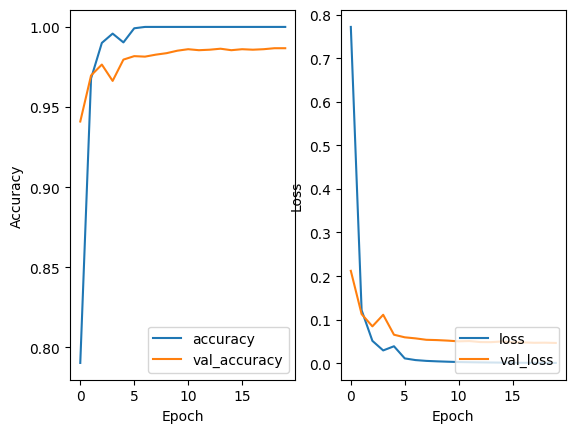

In [12]:
plt.figure()
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [13]:
model.save('OCR.keras')

In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Accuracy : {test_acc * 100} %')

169/169 - 4s - loss: 0.0585 - accuracy: 0.9831 - 4s/epoch - 25ms/step
Accuracy : 98.31137657165527 %


169/169 [==============================] - 5s 25ms/step


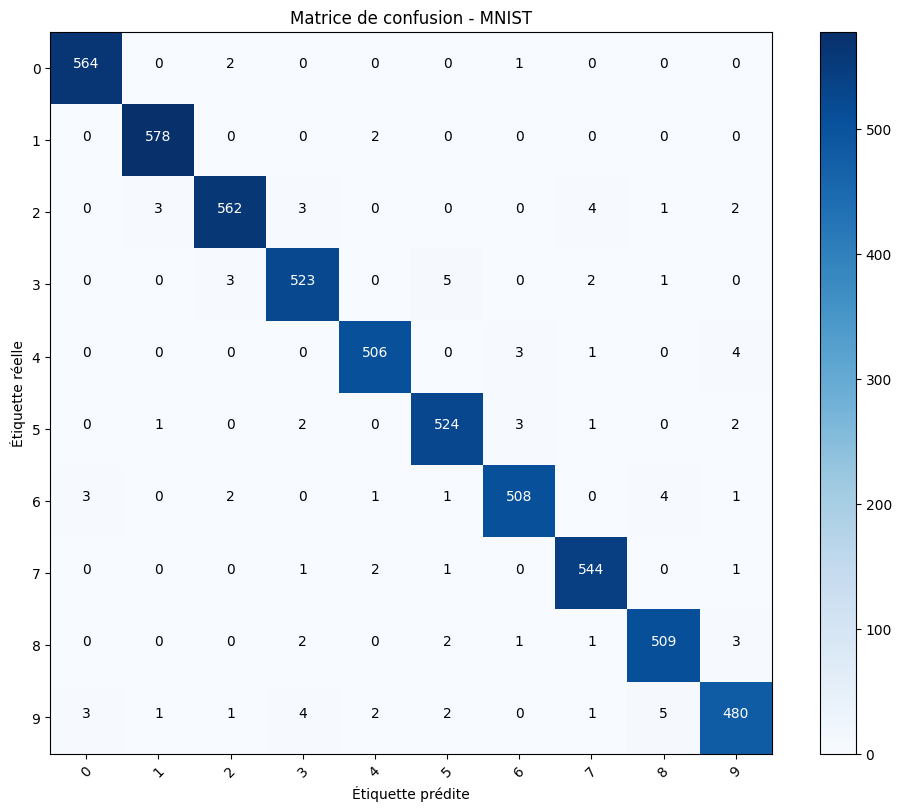

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

# Prédictions sur l'ensemble de test
y_pred = np.argmax(model.predict(X_test), axis=1)

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Fonction pour afficher la matrice de confusion
def plot_confusion_matrix(cm, classes, normalize=False, title='Matrice de confusion', cmap=plt.cm.Blues):
    """
    Affiche la matrice de confusion.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Étiquette réelle')
    plt.xlabel('Étiquette prédite')

# Affichage de la matrice de confusion
plt.figure(figsize=(10, 8))
plot_confusion_matrix(conf_matrix, classes=np.arange(10), title='Matrice de confusion - MNIST')
plt.show()